# Trabalho Final para aprovação do curso Sistemas Inteligentes

#### Instruções: 
- Comentem bastante o código, deixe o mais claro possível
- Usem e abusem do Markdown
- Isso ae!

# Pre-Processamento

#### Importação de bibliotecas

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import matplotlib.colors
import pandas as pd
import time
import plotly
import plotly.plotly as py
import plotly.tools as tls
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')

In [2]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

##### Carregando dataset

In [3]:
#Dataset para treinamento
db = pd.read_csv("bank-additional-dataset/bank-additional-full.csv", sep= ";");

##### Informações sobre o dataset

In [4]:
print("Dimensões do dataset", db.shape)

Dimensões do dataset (41188, 21)


In [5]:
print("Features do dataset: ", db.columns)

Features do dataset:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

##### Como podemos observar há 11 features categóricas, é um número significante e teremos que tratá-los num futuro próximo

In [6]:
#tipos de dados para cada feature
db.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# print the first 20 rows of data
print(db.head(20))

    age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no   

In [8]:
db.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Contando número de valores nulos no dataset
db.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#Visualizando valores unicos do dataset
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())
print()
print("Contact: ",db.contact.unique())
print()
print("Month : ",db.month.unique())
print()
print("Duration: ",db.duration.unique())
print()
print("Campaign: ",db.campaign.unique())
print()
print("Pdays: ",db.pdays.unique())
print()
print("previous: ",db.previous.unique())
print()
print("Poutcome: ",db.poutcome.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']

Contact:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Duration:  [ 261  149  226 ... 1246 1556 1868]

Campaign:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

Pdays:  [999   6   

## Tratamento do dataset por blocos
        - Bank client data
        - Last contact of the current campaign
        - Social and economic context attributes
        - Other attributes:

# 1. Bank Client Data

In [11]:
#Particionando o Dataset para trabalhar apenas com os Client Data
bank_client = db.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [12]:
#Visualizando as amostras 
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']


##### Visualização dos Dados

##### Distribuição de idades

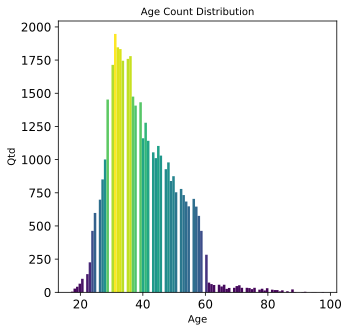

In [13]:
#Deixar Histograma colorido
N, bins, patches = plt.hist(bank_client['age'], bins = 100, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('Age', fontsize =10)
plt.ylabel('Qtd', fontsize =10)
plt.title('Age Count Distribution', fontsize =10)
#plt.savefig('age_count_distribuition.png', format='png', dpi =800)
plt.show()

###### Distribuição de trabalhos dos clientes

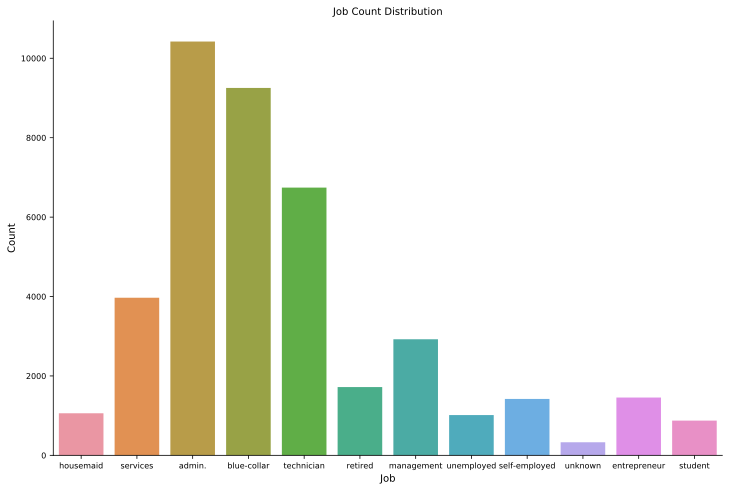

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Job Count Distribution', fontsize=10)
ax.tick_params(labelsize=8)
sns.despine()
# plt.savefig('job_count_distribuition.png', format='png', dpi =200)

##### Distribuição estado civil

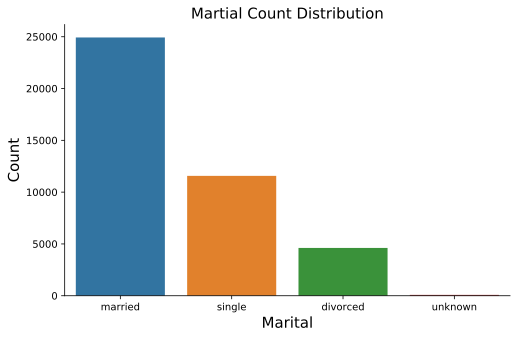

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Martial Count Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()
#plt.savefig('martial_count_distribuition.png', format='png', dpi =300)

##### Distribuição Escolaridade

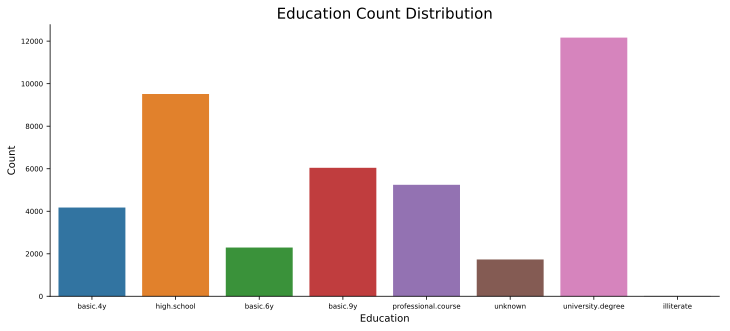

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=7)
sns.despine()
#plt.savefig('education_count_distribuition.png', format='png', dpi =300)

###### Distribuição Housing, Loan e Default

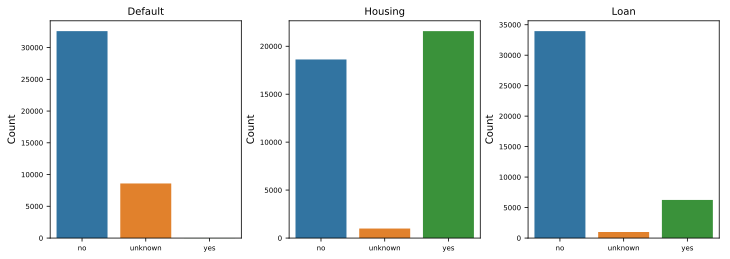

In [17]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=7)
#plt.savefig('housing_count_distribuition.png', format='png', dpi =300)
plt.subplots_adjust(wspace=0.25)

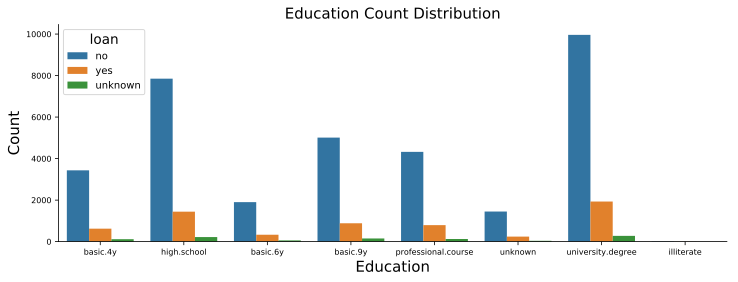

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
sns.countplot(x = 'education', hue = 'loan', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
#plt.savefig('education_count_distribuition_loan.png', format='png', dpi =300)
sns.despine()

#### Tratamento com os dados Categoricos

In [19]:
#Transformações de dados categoricos para valores numericos
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'] )

In [20]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


# 2. Related with the last contact of the current campaign


In [21]:
#Particionando o Dataset para trabalhar apenas com 'Related with the last contact of the current campaign'
bank_related = db.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [22]:
#Visualizando as amostras do dataset
print("Contact: ", bank_related.contact.unique())
print()
print("Month : ", bank_related.month.unique())
print()
print("Day of week: ", bank_related.day_of_week.unique())
print()
print("Duration: ", bank_related.duration.unique())
print()


Contact:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Day of week:  ['mon' 'tue' 'wed' 'thu' 'fri']

Duration:  [ 261  149  226 ... 1246 1556 1868]



In [23]:
# Distribuição Contatos, mes e dias da semana

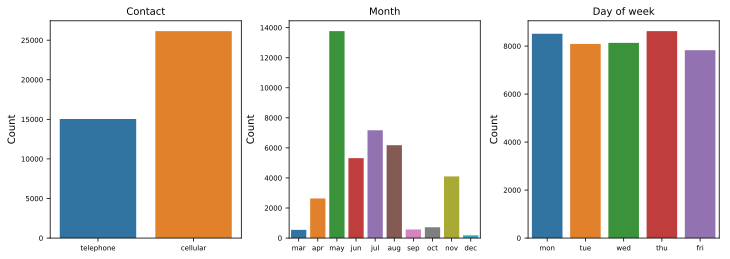

In [24]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

sns.countplot(x = 'contact', data = bank_related, ax = ax1, order = ['telephone', 'cellular'])
ax1.set_title('Contact', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'month', data = bank_related, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec']
)
ax2.set_title('Month', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'day_of_week', data = bank_related, ax = ax3, order = ['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_title('Day of week', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=7)

plt.subplots_adjust(wspace=0.25)

#['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']


##### Distribuição duração vs ocorrência

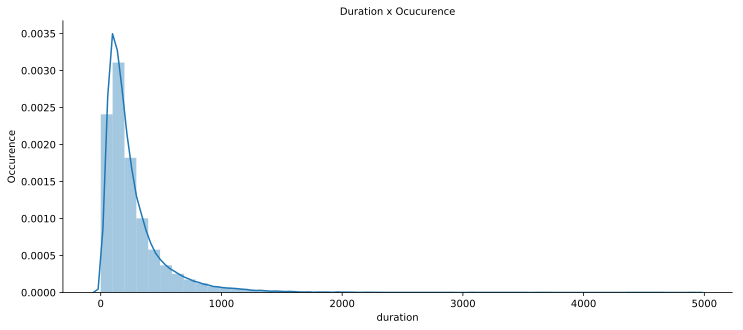

In [25]:

fig, ax2 = plt.subplots()
fig.set_size_inches(12, 5)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)
sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)



In [26]:
# As ligações que tiverem o tempo de duração da ligação zero automaticamente o target será 'no', assim devemos excluir essas linhas
db[(db['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


#### Tratamento com os dados Categoricos

In [27]:
#Transformações de dados categoricos para valores numericos
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])


bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


# 3. Social and economic context attributes

In [28]:
#Particionando o Dataset para trabalhar apenas com 'Social and Economic context attibutes'
bank_se = db.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# 4. Other attributes

In [29]:
bank_o = db.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [30]:
#Visualizando as amostras do dataset
print("Contact: ", bank_o.poutcome.unique())
print()

Contact:  ['nonexistent' 'failure' 'success']



##### Tratamento com dados categoricos

In [31]:
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])
#bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


# Validação dos dados 

In [32]:
#Montado o dataset pre-processado
db_pronto= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
db_pronto = db_pronto[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

#Criando Target
y = pd.get_dummies(db['y'], columns = ['y'], prefix = ['y'], drop_first = True)

#Excluindo linhas no qual o tempo de ligação é 0
db_pronto = db_pronto.drop('duration', axis=1)
#y = y.drop([6251,23031,28063, 33015], axis = 0)

#Confirmando exclusão
#print(db_pronto.loc[db_pronto['duration'] == 0])

print(db_pronto.shape)
print(y.shape)

(41188, 19)
(41188, 1)


In [33]:
# Funçcao de agrupamento dos valores de idade, para diminuir a complexidade do campo
# (muitos valores) - ALTERAR_REESCREVER
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(db_pronto);

db_pronto.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


In [34]:
sc_X = StandardScaler()
db_pronto = sc_X.fit_transform(db_pronto)
db_pronto

array([[ 1.38823133, -0.20157925, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 1.38823133,  0.91122681, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 0.02907204,  0.91122681, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       ...,
       [ 1.38823133,  0.35482378, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 0.02907204,  1.46762984, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 2.74739063,  0.35482378, -0.2837415 , ...,  0.1954139 ,
         1.67113606, -2.56309793]])

# Treinamento do modelo

In [35]:
y_array = np.array(y)

#transformando em um vetor 1D
y_array = y_array.reshape(-1)
#y_array = y_array.flatten()

y_array.shape

(41188,)

In [36]:
#Bibliotecas para validação dos modelos
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold

In [37]:
# Inicializaçcao do cross-validator KFold, fixado com uma seed de aleatoriedade
# Automaticamente misturando a base e segmentando em 10 partes.
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## 1. KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNN

###### Escolhendo K vizinhos para o modelo

k=1 84.92 
k=2 89.07 
k=3 88.37 
k=4 89.36 
k=5 89.19 
k=6 89.56 
k=7 89.43 
k=8 89.69 
k=9 89.57 
k=10 89.69 
k=11 89.67 
k=12 89.76 
k=13 89.73 
k=14 89.80 
k=15 89.70 
k=16 89.81 
k=17 89.77 
k=18 89.84 
k=19 89.84 
Número ótimo de vizinhos é  19 com 89.8%


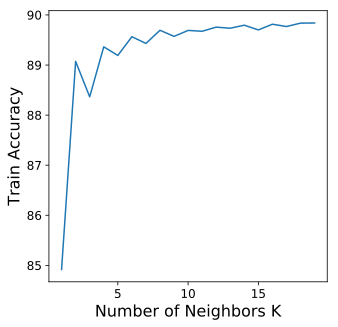

In [69]:
#Procedimento para avaliar um numero otimo de vizinhos para o classificador

neighbors = np.arange(1,20)

#Lista vazia para guardar os resultados
cv_scores = []

#Interação para poder decidir quando vizinhos usar no KNN com 10-fold
for k in neighbors:
    k_value = k
    knn = KNN(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean', n_jobs=4)
    #kfold = KFold(n_splits=10, random_state=42)
    scores = cross_val_score(knn, db_pronto, y_array, cv=kfold, scoring='accuracy', n_jobs=4)
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f " % (k_value, scores.mean()*100))

optimal_k = cv_scores.index(max(cv_scores)) + 1
print ("Número ótimo de vizinhos é  %d com %0.1f%%" % (optimal_k, cv_scores[optimal_k - 1]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [71]:
# Uma vez escolhido k vizinhos vamos validar o modelo com os k vizinhos e obter o tempo de processamento
# para esta validaçao
timerStartKNN = time.time()
knn = KNN(n_neighbors = optimal_k, weights='uniform', p=2, metric='euclidean', n_jobs=4)
scores = cross_validate(estimator=knn, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStopKNN = time.time()
cpuTimeKNN = timerStopKNN - timerStartKNN

In [72]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores = pd.DataFrame(scores)
scores.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.609035,4.269222,0.898276,0.903423,0.614973,0.672633,0.248918,0.278842,0.354391,0.394247
1,0.631625,4.272226,0.890265,0.903666,0.556757,0.672454,0.217759,0.278858,0.313070,0.394232
2,0.615151,4.199137,0.902161,0.902749,0.636364,0.675741,0.262115,0.266842,0.371295,0.382600
3,0.646833,4.170183,0.896091,0.902857,0.594737,0.670421,0.243534,0.270833,0.345566,0.385809
4,0.678987,4.299368,0.897548,0.903450,0.587065,0.682588,0.258206,0.269902,0.358663,0.386843
5,0.613278,4.469620,0.892692,0.904044,0.664894,0.678154,0.248016,0.266441,0.361272,0.382572
6,0.653059,4.378164,0.905560,0.902479,0.622754,0.680412,0.241860,0.266508,0.348409,0.383001
7,0.664202,4.353923,0.904831,0.902263,0.660920,0.672320,0.256696,0.264790,0.369775,0.379942
8,0.656419,4.456769,0.897523,0.903561,0.623529,0.676869,0.228448,0.275383,0.334385,0.391489
9,0.622479,4.441401,0.898980,0.902832,0.688889,0.670777,0.256198,0.261790,0.373494,0.376601


In [76]:
print("Média Acurácia", round(scores['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores['test_precision'].mean(), 3))
print("Média Recall", round(scores['test_recall'].mean(), 3))
print("Média F1Score", round(scores['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeKNN/3600), int(cpuTimeKNN/60), int(cpuTimeKNN%60)))

Média Acurácia 0.898
Média Precisão 0.625
Média Recall 0.246
Média F1Score 0.353
Tempo de CPU 00:06:14


374.4076626300812

## 2. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier


In [41]:
timerStartDT = time.time()
dtree = DecisionTreeClassifier(criterion='gini') #ou Gini
scores_1 = cross_validate(estimator=dtree, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStopDT = time.time()
cpuTimeDT = timerStopDT - timerStartDT

In [42]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_1 = pd.DataFrame(scores_1)
scores_1.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.127341,0.005663,0.849721,0.987807,0.340122,0.995742,0.361472,0.895644,0.350472,0.943044
1,0.114346,0.005394,0.841952,0.987914,0.298643,0.995206,0.279070,0.896808,0.288525,0.943449
2,0.120370,0.005502,0.849478,0.987510,0.321888,0.995211,0.330396,0.893693,0.326087,0.941724
3,0.116720,0.005487,0.846322,0.988184,0.325052,0.995493,0.338362,0.899186,0.331573,0.944892
4,0.122331,0.005520,0.839281,0.987591,0.307692,0.996003,0.358862,0.893617,0.331313,0.942036
5,0.119886,0.005611,0.838796,0.987645,0.334711,0.994089,0.321429,0.894584,0.327935,0.941715
6,0.124801,0.005710,0.847293,0.987941,0.284165,0.995262,0.304651,0.898100,0.294052,0.944188
7,0.121772,0.005500,0.851177,0.987833,0.324841,0.995234,0.341518,0.896708,0.332971,0.943406
8,0.124391,0.006073,0.840942,0.987888,0.307847,0.995480,0.329741,0.896552,0.318418,0.943430
9,0.112355,0.005453,0.839242,0.988265,0.330798,0.995209,0.359504,0.899663,0.344554,0.945027


In [44]:
print("Média Acurácia", round(scores_1['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_1['test_precision'].mean(), 3))
print("Média Recall", round(scores_1['test_recall'].mean(), 3))
print("Média F1Score", round(scores_1['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeDT/360), int(cpuTimeDT/60), int(cpuTimeDT%60)))

Média Acurácia 0.844
Média Precisão 0.318
Média Recall 0.333
Média Recall 0.325
Tempo de CPU 00:00:01


### 3. Artificial Neural Networks

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
scores_2_list = []
for i in range(1,16):
    scores_2_tmp = []
    ANN = MLPClassifier(hidden_layer_sizes=(i))
    scores_2_pre = cross_validate(estimator=ANN, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)
    scores_2_tmp.append(scores_2_pre['fit_time'].mean())
    scores_2_tmp.append(scores_2_pre['score_time'].mean())
    scores_2_tmp.append(scores_2_pre['test_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['train_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['test_accuracy'].mean())
    scores_2_tmp.append(scores_2_pre['train_precision'].mean())
    scores_2_tmp.append(scores_2_pre['test_recall'].mean())
    scores_2_tmp.append(scores_2_pre['train_recall'].mean())
    scores_2_tmp.append(scores_2_pre['test_f1'].mean())
    scores_2_tmp.append(scores_2_pre['train_f1'].mean())
    scores_2_list.extend(scores_2_tmp)


In [48]:
#Para cada hidden layer temos as métricas médias proveniente do K-fold CV
scores_2_list = np.array(scores_2_list)
scores_2_list = scores_2_list.reshape(15,10)
scores_2_list = pd.DataFrame(scores_2_list)
scores_2_list.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]
scores_2_list

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.813395,0.019450,0.894290,0.893807,0.894290,0.337499,0.113068,0.110661,0.170103,0.166656
1,12.011943,0.014450,0.897640,0.897740,0.897640,0.576864,0.214415,0.212220,0.311717,0.309803
2,12.867773,0.029630,0.899534,0.900144,0.899534,0.663216,0.227667,0.231095,0.337616,0.342678
3,11.155915,0.019048,0.900044,0.900489,0.900044,0.666835,0.230515,0.234168,0.341344,0.346375
4,11.890694,0.017740,0.899801,0.900718,0.899801,0.672801,0.227045,0.232021,0.337534,0.344777
5,13.495312,0.020580,0.899995,0.900783,0.899995,0.669625,0.232898,0.235866,0.343811,0.348644
6,11.842052,0.017278,0.900651,0.901349,0.900651,0.678338,0.230606,0.236818,0.343001,0.350870
7,13.111591,0.019299,0.900214,0.901517,0.900214,0.678388,0.231944,0.239626,0.343449,0.353930
8,13.838988,0.022611,0.899971,0.901220,0.899971,0.677256,0.230944,0.235510,0.341829,0.349389
9,12.287333,0.019812,0.900165,0.901158,0.900165,0.674543,0.233993,0.237353,0.345284,0.350915


In [49]:
#Maior acurácia
nHiddenLayers = scores_2_list['test_accuracy'].idxmax()
print("Numero ótimo de camadas: %i" % int(nHiddenLayers))

Numero ótimo de camadas: 14


In [50]:
#Selecionando valores das metricas na qual o modelo se saiu melhor na acuracia para k hidden layers
scores_2 = scores_2_list.loc[nHiddenLayers]
scores_2

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
14,22.543915,0.021129,0.900796,0.902164,0.900796,0.67722,0.246938,0.252102,0.359192,0.367052


In [54]:
timeStartANN = time.time()
ANN = MLPClassifier(hidden_layer_sizes=nHiddenLayers)
scores_2 = cross_validate(estimator=ANN, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timeStopANN = time.time()
cpuTimeANN = timeStopANN - timeStartANN

In [55]:
print("Média Acurácia", round(scores_2['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_2['test_precision'].mean(), 3))
print("Média Recall", round(scores_2['test_recall'].mean(), 3))
print("Média F1", round(scores_2['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeANN/360), int(cpuTimeANN/60), int(cpuTimeANN%60)))

Média Acurácia 0.9
Média Precisão 0.658
Média Recall 0.242
Média F1 0.353
Tempo de CPU 00:00:33


## 4. Linear Discriminant Analysis (LDA)

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [57]:
timerStartLDA = time.time()
LDA = LinearDiscriminantAnalysis()
scores_3 = cross_validate(estimator=LDA, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStopLDA = time.time()
cpuTimeLDA = timerStopLDA - timerStartLDA

In [58]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_3 = pd.DataFrame(scores_3)
scores_3.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.120366,0.003612,0.890750,0.891446,0.518750,0.527113,0.359307,0.358305,0.424552,0.426617
1,0.035687,0.003578,0.880068,0.892120,0.468085,0.529066,0.325581,0.366931,0.384040,0.433329
2,0.036489,0.003541,0.895363,0.890475,0.536050,0.521905,0.376652,0.358576,0.442432,0.425092
3,0.035607,0.003597,0.889779,0.891365,0.515625,0.526372,0.355603,0.356082,0.420918,0.424796
4,0.035389,0.003561,0.890750,0.891338,0.511111,0.527032,0.352298,0.361224,0.417098,0.428652
5,0.035579,0.003579,0.890750,0.891688,0.582317,0.521724,0.378968,0.351306,0.459135,0.419882
6,0.035592,0.003619,0.896820,0.891176,0.508418,0.531095,0.351163,0.357007,0.415406,0.426989
7,0.035512,0.003532,0.895606,0.891338,0.529605,0.529539,0.359375,0.350668,0.428191,0.421929
8,0.034385,0.003576,0.887081,0.891098,0.498442,0.523826,0.344828,0.365900,0.407643,0.430847
9,0.033144,0.003576,0.893152,0.891772,0.569620,0.525623,0.371901,0.355390,0.450000,0.424060


In [59]:
print("Média Acurácia", round(scores_3['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_3['test_precision'].mean(), 3))
print("Média Recall", round(scores_3['test_recall'].mean(), 3))
print("Média Recall", round(scores_3['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i:%i" % (int(cpuTimeLDA/360), int(cpuTimeLDA/60), int(cpuTimeLDA%60), (cpuTimeLDA*1000)))

Média Acurácia 0.891
Média Precisão 0.524
Média Recall 0.358
Média Recall 0.425
Tempo de CPU 00:00:00:682


## 5. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
timerStartLR = time.time()
logmodel = LogisticRegression() 
scores_4 = cross_validate(estimator=logmodel, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStopLR = time.time()
cpuTimeLR = timerStopLR - timerStartLR

In [62]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_4 = pd.DataFrame(scores_4)
scores_4.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.169896,0.003666,0.899247,0.900591,0.640719,0.682728,0.231602,0.220440,0.340223,0.333273
1,0.157213,0.003557,0.893178,0.900888,0.613793,0.679012,0.188161,0.224382,0.288026,0.337302
2,0.158091,0.003567,0.906045,0.899593,0.710692,0.673913,0.248899,0.214763,0.368679,0.325725
3,0.157058,0.003595,0.899247,0.900213,0.654088,0.674982,0.224138,0.220307,0.333868,0.332190
4,0.154780,0.003576,0.900947,0.900105,0.660131,0.675695,0.221007,0.220655,0.331148,0.332673
5,0.171313,0.003598,0.893421,0.900915,0.704403,0.672375,0.222222,0.218327,0.337858,0.329622
6,0.165005,0.003592,0.904831,0.899701,0.630137,0.678003,0.213953,0.222565,0.319444,0.335122
7,0.155219,0.003538,0.907502,0.899242,0.731034,0.670395,0.236607,0.214456,0.357504,0.324959
8,0.155614,0.003571,0.899223,0.900135,0.684211,0.670749,0.196121,0.222941,0.304858,0.334651
9,0.160224,0.003582,0.898252,0.900486,0.712418,0.673864,0.225207,0.217757,0.342229,0.329151


In [63]:
print("Média Acurácia", round(scores_4['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_4['test_precision'].mean(), 3))
print("Média Recall", round(scores_4['test_recall'].mean(), 3))
print("Média Recall", round(scores_4['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeLR/360), int(cpuTimeLR/60), int(cpuTimeLR%60)))

Média Acurácia 0.9
Média Precisão 0.674
Média Recall 0.221
Média Recall 0.332
Tempo de CPU 00:00:01


## 6. Support Vector Machine (SVM)

In [64]:
from sklearn.svm import LinearSVC

In [66]:
timerStartSVM = time.time()
SVM = LinearSVC()
scores_5 = cross_validate(estimator=SVM, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)
timerStopSVM = time.time()
cpuTimeSVM = timerStopSVM - timerStartSVM

In [67]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_5 = pd.DataFrame(scores_5)
scores_5.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,8.761498,0.017814,0.899490,0.900186,0.664384,0.697521,0.209957,0.202011,0.319079,0.313289
1,9.028201,0.028181,0.893421,0.900726,0.626866,0.698129,0.177590,0.205904,0.276771,0.318013
2,8.641056,0.015383,0.905802,0.899215,0.735714,0.690034,0.226872,0.195174,0.346801,0.304283
3,8.497209,0.022332,0.898519,0.900375,0.657534,0.698765,0.206897,0.203305,0.314754,0.314969
4,8.884641,0.021931,0.899247,0.899916,0.650000,0.696266,0.199125,0.200574,0.304858,0.311433
5,8.761101,0.025932,0.892207,0.900834,0.702703,0.692630,0.206349,0.199952,0.319018,0.310319
6,8.936981,0.025771,0.904831,0.899593,0.655738,0.696141,0.186047,0.205701,0.289855,0.317565
7,8.951710,0.004358,0.906045,0.899080,0.756303,0.687760,0.200893,0.197042,0.317460,0.306323
8,6.648768,0.004080,0.900680,0.900162,0.735043,0.691070,0.185345,0.205699,0.296041,0.317033
9,7.170718,0.004075,0.897766,0.900135,0.740458,0.689167,0.200413,0.198989,0.315447,0.308813


In [68]:
print("Média Acurácia", round(scores_5['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_5['test_precision'].mean(), 3))
print("Média Recall", round(scores_5['test_recall'].mean(), 3))
print("Média Recall", round(scores_5['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTime/360), int(cpuTime/60), int(cpuTime%60)))

Média Acurácia 0.9
Média Precisão 0.692
Média Recall 0.2
Média Recall 0.31
Tempo de CPU 00:00:37


In [77]:
print("Acuraria média KNN: %.5f" % scores['test_accuracy'].mean())
print("Acuraria média DecisionTree: %.5f" % scores_1['test_accuracy'].mean())
print("Acuraria média ANN: %.5f" % scores_2['test_accuracy'].mean())
print("Acuraria média LDA: %.5f" % scores_3['test_accuracy'].mean())
print("Acuraria média LogReg: %.5f" % scores_4['test_accuracy'].mean())
print("Acuraria média SVM: %.5f" % scores_5['test_accuracy'].mean())


Acuraria média KNN: 0.89839
Acuraria média DecisionTree: 0.84442
Acuraria média ANN: 0.90033
Acuraria média LDA: 0.89101
Acuraria média LogReg: 0.90019
Acuraria média SVM: 0.89980


In [78]:
#Comparação dos modelos - Acurácia
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_accuracy'].mean(), scores_1['test_accuracy'].mean(), scores_2['test_accuracy'].mean(), scores_3['test_accuracy'].mean(), scores_4['test_accuracy'].mean(), scores_5['test_accuracy'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
2,Artificial Neural Networks,0.900335
4,Logistic Regression,0.900189
5,Support Vector Machine,0.899801
0,K-Near Neighbors,0.898393
3,Linear Discriminant Analysis (LDA),0.891012
1,Decision Tree,0.844420


In [79]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/26/acuracia-de-teste-por-modelo/')
py.iplot(fig)

In [80]:
#Comparação dos modelos - Recall
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_recall'].mean(), scores_1['test_recall'].mean(), scores_2['test_recall'].mean(), scores_3['test_recall'].mean(), scores_4['test_recall'].mean(), scores_5['test_recall'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
3,Linear Discriminant Analysis (LDA),0.357568
1,Decision Tree,0.332501
0,K-Near Neighbors,0.246175
2,Artificial Neural Networks,0.241901
4,Logistic Regression,0.220792
5,Support Vector Machine,0.199949


In [82]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/42/recall-de-teste-por-modelo/')
py.iplot(fig)

In [83]:
#Comparação dos modelos - Precisão
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_precision'].mean(), scores_1['test_precision'].mean(), scores_2['test_precision'].mean(), scores_3['test_precision'].mean(), scores_4['test_precision'].mean(), scores_5['test_precision'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
5,Support Vector Machine,0.692474
4,Logistic Regression,0.674163
2,Artificial Neural Networks,0.658356
0,K-Near Neighbors,0.625088
3,Linear Discriminant Analysis (LDA),0.523802
1,Decision Tree,0.317576


In [85]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/46/precision-de-teste-por-modelo/')
py.iplot(fig)

In [86]:
#Comparação dos modelos - F1 Score
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_f1'].mean(), scores_1['test_f1'].mean(), scores_2['test_f1'].mean(), scores_3['test_f1'].mean(), scores_4['test_f1'].mean(), scores_5['test_f1'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
3,Linear Discriminant Analysis (LDA),0.424942
2,Artificial Neural Networks,0.353070
0,K-Near Neighbors,0.353032
4,Logistic Regression,0.332384
1,Decision Tree,0.324590
5,Support Vector Machine,0.310009


In [87]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/38/f1-score-de-teste-por-modelo/')
py.iplot(fig)

In [111]:
# Comparativo de tempo de processamento
print('{0:20} {1:5f} {2}'.format("KNN:", cpuTimeKNN, "segundos."))
print('{0:20} {1:5f} {2}'.format("DecisionTree:", cpuTimeDT, "segundos."))
print('{0:20} {1:5f} {2}'.format("ANN:", cpuTimeANN, "segundos."))
print('{0:20} {1:5f} {2}'.format("LogisticRegression:", cpuTimeLR, "segundos."))
print('{0:20} {1:5f} {2}'.format("LDA:", cpuTimeLDA, "segundos."))
print('{0:20} {1:5f} {2}'.format("SVM:", cpuTimeSVM, "segundos."))

KNN:                 374.407663 segundos.
DecisionTree:        1.621363 segundos.
ANN:                 33.687569 segundos.
LogisticRegression:  1.849897 segundos.
LDA:                 0.682486 segundos.
SVM:                 25.033144 segundos.


# Resultados e Metricas 

# Discussões

# Referências

http://deeplizard.com/learn/video/FK77zZxaBoI

stackoverflow

plotly

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ([Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014)
